# Python II - Assignment 1

This **Home Assignment** is to be submitted and you will be given points for each of the tasks. It familiarizes you with basics of *statistics* and basics of the *sklearn* package as well as the general setup for home assignments.
This first home assignment is shorter and also less difficult than upcoming ones.

## Formalities
**Submit in a group of 2-3 people until 01.06.2020 23:59CET. The deadline is strict!**

## Evaluation and Grading
General advice for programming excercises at *CSSH*:
Evaluation of your submission is done semi automatically. Think of it as this notebook being 
executed once. Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Use external libraries only when specified by task.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature of e.g. a function usually can be inferred from task description, 
  code skeletons and test cases.
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Double check if your code relies on presence of files or directories other than those mentioned
    in given tasks. Tests run under Linux, hence don't use Windows style paths 
    (`some\path`, `C:\another\path`). Also, use paths only that are relative to and within your
    working directory (OK: `some/path`, `./some/path`; NOT OK: `/home/alice/python`, 
    `../../python`).
* Keep your code idempotent! Running it or parts of it multiple times must not yield different
  results. Minimize usage of global variables.
* Ensure your code / notebook terminates in reasonable time.

**There's a story behind each of these points! Don't expect us to fix your stuff!**

Regarding the scores, you will get no points for a task if:
- your function throws an unexpected error (e.g. takes the wrong number of arguments)
- gets stuck in an infinite loop
- takes much much longer than expected (e.g. >1s to compute the mean of two numbers)
- does not produce the desired output (e.g. returns an descendingly sorted list even though we asked for ascending, returns the mean and the std even though we asked for the mean only, only prints the output instead of returning it!)
- ...

In [1]:
# credentials of all team members (you may add or remove items from the dictionary)
team_members = [
    {
        'first_name': 'Pablo',
        'last_name': 'Ender',
        'student_id': 399171
    },
    {
        'first_name': 'Charlotte',
        'last_name': 'Wetzler',
        'student_id': ??
    }
]

## 1.) Using pandas (2.5 points total)

### a) Load the credit-g dataset (1)

Write a function `load_credit`. It takes no arguments. It returns a dataframe.

Assume there is a file `credit-g.csv` load it into a pandas dataframe. Convert all non numeric columns to Categorical columns.
Convert the `employment` column to an ordered Categorical column. The correct order is ascending by the length of employment, `unemployed` is the shortest.
Return this dataframe.





### b) Basic information (0.5)

Write a function `basic_info` that takes a loaded and preprocessed dataframe as above as argument. It returns a dict.

The dict contains the following information for the provided dataframe:
```python
{'n_rows' : 0, #number of rows
 'n_columns' : 0, #number of columns
 'average_credit' : 0.0, # average credit_amount
 'credit_purposes' : [], # all purposes, each only once, as strings
 'fraction_good' : 0.0, # fraction of instances with 'class'==good
 'fraction_bad' : 0.0} # fraction of instances with 'class'==bad
```
Do not hard code the answers but actually compute them from the dataframe.

### c) Distribution on subsets (1)

Write a function `subset_info` that takes the same input as in b) and also returns a dict.

Return the ratio of good to bad instances for different subsets of the dataset:
```python
{'young': 0.0, # people below 40
 'old': 0.0, # people with age 40 or greater
 'male' : 0.0, # obvious
 'female' : 0.0, # obvious
 'young_male' : 0.0, # people that are young and male 
 'employed' : 0.0} # people that are employed for at least one year 
```

If you have 10 good instances and 5 bad instances the ration is 2.

In [153]:
#df = pd.read_csv (r"credit-g.csv", na_values="?")

In [54]:
import pandas as pd

def load_credit():
    #not beautiful but works
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    #do some data science stuff
    df = pd.read_csv (r"credit-g.csv", na_values="?") #read the data
    toCategorical = df.select_dtypes(exclude=numerics) #extract non-numerical Values
    numericVals = df.select_dtypes(include=numerics) #extract numerical Values
    toCategorical = toCategorical.astype('category') #transform non numerical Values to categorical
    #merge the 2 datasets
    goodData = pd.concat([toCategorical,numericVals],axis=1)
    
    #change Data order
    cats_to_order = ["unemployed", "'<1'","'1<=X<4'", "'4<=X<7'","'>=7'"]
    goodData['employment'].cat.reorder_categories(cats_to_order, inplace=True)
    
    #group the data
    goodData.sort_values(["employment"], axis=0, ascending=True, inplace=True) 
    
    return goodData
    pass
#see https://pbpython.com/pandas_dtypes_cat.html for useful help in ordering categorical data
df = load_credit()

In [2]:
def basic_info():
    
    info = { 'n_rows' : len(df), #number of rows
         'n_columns' : len (df.columns), #number of columns
         'average_credit' : df["credit_amount"].mean(), # average credit_amount
         'credit_purposes' : list(df['purpose'].value_counts().index), # all purposes, each only once, as strings
         'fraction_good' : (df["class"].value_counts()).values[0], # fraction of instances with 'class'==good
         'fraction_bad' : (df["class"].value_counts()).values[1] # fraction of instances with 'class'==bad
       }
    
    return info
    pass

In [42]:
def subset_info(df):
    info =    {
        'young': (((df['age'] <40) & (df['class'] == 'good')).value_counts()).values[1]/(((df['age'] <40) & (df['class'] == 'bad')).value_counts()).values[1],
         'old' : (((df['age'] >40) & (df['class'] == 'good')).value_counts()).values[1]/(((df['age'] >40) & (df['class'] == 'bad')).value_counts()).values[1],
         'male' : (((df['personal_status'] != "'female div/dep/mar'") & (df['class'] == 'good')).value_counts()).values[1]/(((df['personal_status'] != "'female div/dep/mar'") & (df['class'] == 'bad')).value_counts()).values[1],
         'female' : (((df['personal_status'] == "'female div/dep/mar'") & (df['class'] == 'good')).value_counts()).values[1]/(((df['personal_status'] == "'female div/dep/mar'") & (df['class'] == 'bad')).value_counts()).values[1],
         'young_male' : (((df['personal_status'] != "'female div/dep/mar'") & (df['class'] == 'good') & (df['age'] < 40)).value_counts()).values[1]/(((df['personal_status'] != "'female div/dep/mar'") & (df['class'] == 'bad')& (df['age'] < 40)).value_counts()).values[1],
         'employed' : (((df['employment'] != "unemployed") & (df['class'] == 'good')).value_counts()).values[0]/(((df['employment'] != "unemployed") & (df['class'] == 'bad')).value_counts()).values[0]} # people that are employed for at least one year 
    return info
    pass

## 2.) Visualizing (3 points total)
In this task you are required to do some visualizations. You can use the `matplotlib` and `seaborn` library. Please show the plot here in the notebook and save the figures. We will deduct points if figures are lacking labels, legend, etc. We will also deduct points if axis labels are unreadable. Titles are not required.

When talking about a figure always start with a *small description* (1-2 sentences) of what you see. Only thereafter start explaining. Also **save** your explanation strings in identically named **files**. So if you should save your explanation in `foo`, save that string also in `foo.txt`. Use the `.txt` extension.

### a) Age vs Amount (0.5)

Create a scatterplot that visualizes the distribution of class labels in the age-credit_amount space. Save the plot as `'credit_age.png

In [89]:
import matplotlib.pyplot as plt
import seaborn as sb
df = pd.read_csv (r"credit-g.csv", na_values="?")

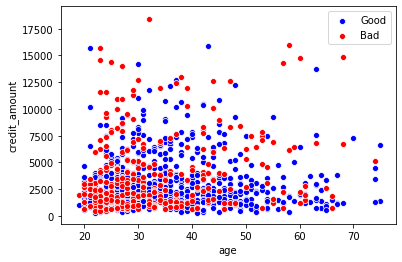

In [88]:
#split Data, dont know how to do it different
goodGuys = df[df["class"] == 'good']
badGuys = df[df["class"] == 'bad']


ageVsAmount = sb.scatterplot(goodGuys['age'],goodGuys['credit_amount'],color='b')
ageVsAmount = sb.scatterplot(badGuys['age'],badGuys['credit_amount'],color='r')
ageVsAmount.legend(["Good","Bad"])
figure = ageVsAmount.get_figure()
figure.savefig("credit_age.png")

#### Easy to classify? (0.5)

Explain whether it is easy to classify good vs bad using only the age and credit_amount columns. Store your explanation as a string in `explanation_a`.

In [9]:
explanation_a = "It is not recommended to classify the people in the dataset using the age and credit_amount only, because, as observable in Figure credit_age.png, there is no significant pattern observable in the data. In other words: the data does not split in two sepearte areas, the points in the figure are not seperated."
with open('explanation_a.txt', 'w') as f:
    f.write(explanation_a)

### b) Distribution by purpose (1.0)

Visualize the distribution of class labels by purpose and credit_amount. Do **not** use a **scatterplot**. Save the plot as `'purpose.png'`

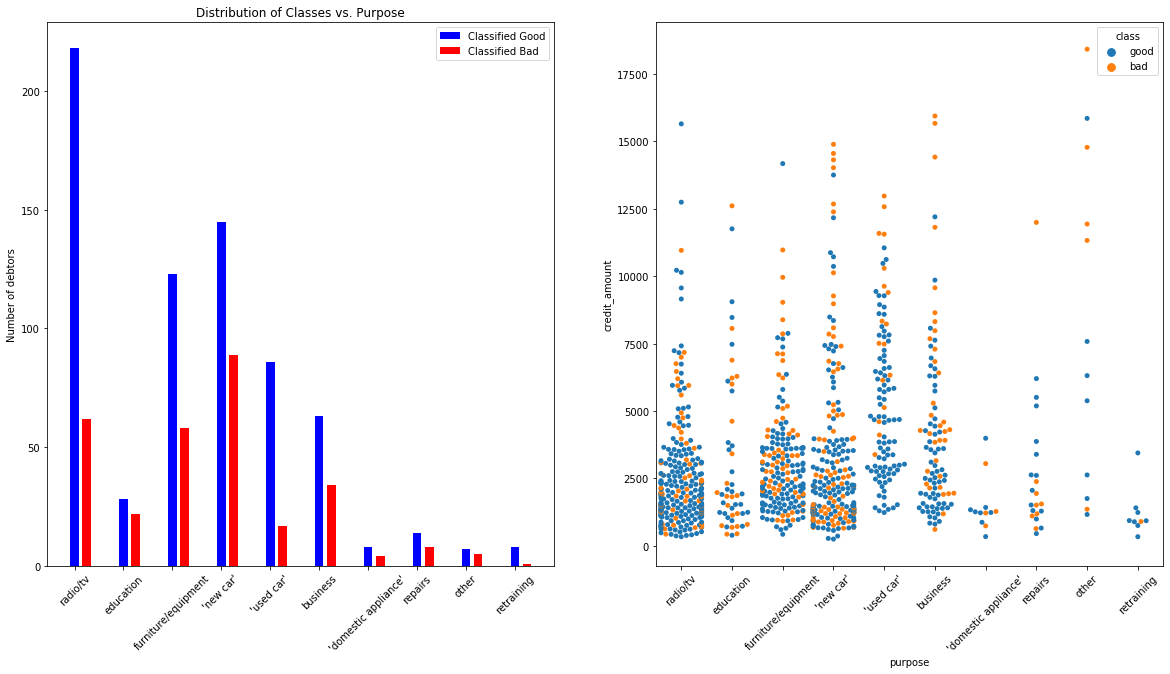

In [131]:
#preprocess data
data = df[["purpose","class"]]
goodGuys = data[data["class"] == 'good']
badGuys = data[data["class"] == 'bad']
xLabels = data["purpose"].unique()
goodBar = [0] * len(xLabels)
badBar = [0] * len(xLabels)

for i in range (0,len(xLabels)):
    goodBar[i] = [len(goodGuys[goodGuys['purpose']==xLabels[i]])]
pass

for i in range(0,len(xLabels)):
    badBar[i] = [len(badGuys[badGuys['purpose']==xLabels[i]])]
pass

#making lists out of lists of lists, another preprocess step
flatgoodBar = []
for sublist in goodBar:
    for item in sublist:
        flatgoodBar.append(item)
        
flatbadBar = []
for sublist in badBar:
    for item in sublist:
        flatbadBar.append(item)
        
        
        
        
r1 = []
for i in range(0, (len(xLabels)*2)):
    if i%2 == 0:
        r1.append(i)
        
r2 = [x+0.5 for x in r1]        
        
#add some variables for the plot
width = 0.35
barWidth = 0.25        


#subplot the stuff

fig = plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
ax.set_aspect(1)
p1 = plt.bar(r1, flatgoodBar, width,color='b')
p2 = plt.bar(r2, flatbadBar, width,color='r')
plt.xticks([r + barWidth for r in range(len(r1))], xLabels)
plt.xticks(rotation=45)
plt.xticks(r1)
plt.legend((p1[0], p2[0]), ('Classified Good', 'Classified Bad'))
plt.ylabel('Number of debtors')
plt.title('Distribution of Classes vs. Purpose')


plt.subplot(1, 2, 2)
ax.set_aspect(2)
ax = sb.swarmplot(x="purpose", y="credit_amount", data=df,hue="class")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


#save it
fig.savefig("purpose.png")

#### Easy to classify? (1.0)

Using the visualization from b) explain which purposes (if any) are easy to classify given the two attributes. Elaborate on the relevance of your findings.

Store your explanation as a string in `explanation_b`.

In [46]:
explanation_a = "Some explanations"
with open('explanation_a.txt', 'w') as f:
    f.write(explanation_a)

## 3.) Classification on credit-g (3.5 points total)

In this task you should experiment with the different classifiers on sklearn.


### a) Preparation (0.5)

Write a function `preparation` that takes a dataframe like produced in 1 and prepares it for use with sklearn. The required steps are:

- compute the boolean target vector (True if 'class' is 'good')
- remove the target column from the dataframe
- convert the categorical variables to numeric ones using pd.get_dummies

Thereafter return 1) the prepared dataframe and 2) the target vector.

In [48]:
df = load_credit()

def preparation(df):
    df["class"] = df["class"].replace("good",1)
    df["class"] = df["class"].replace("bad",0)
    df["class"] = df["class"].astype('bool')
    targetVector = df["class"]
    df.drop("class", axis=1,inplace=True)
    df = pd.get_dummies(df)
    return df, targetVector

[df,tV] = preparation(df)

#### Talk about pd.get_dummies (0.75)

Explain what `pd.get_dummies` does. Thereby also talk about the drawbacks and or advantages of this method regarding in particular the `employment` column. Save the explanation in `dummies`. (Same rules apply as in 2.) for working with explanations). Also write the results to a file `dummies.txt`.

In [15]:
explanation_dummies = "The get dummies function splits up categorical, non numerical columns into binary variables. The getdummies function is an easy way to include categorical features in your machine learning model, it has the advantage that it prevents a hierarchy between the different features. The function creates a new column for each category of a feature with names corresponding to the original column and its values. So naturally the new dataframe will come with more columns, depending on the specific dataframe, than the original data. A drawback could be that the new Datasets can end up being confusing and oversized to handle."
with open('dummies.txt', 'w') as f:
    f.write(explanation_dummies)

### b) Generic evaluation (1.5)

Write a function `my_eval` that takes 5 inputs. 1) A prepared dataframe, 2) the target vector 3) a sklearn classifier class 4) a dict of potential parameters to create a classifier instance from 5) a dict of parameters passed to the `.fit` function of a classifier.

The function instanciates a new classifier from the given class using the provided dict in 4). It then performs 10 fold cross validation of this classifier instance on the provided dataset and target vector providing the dict of fit parameters.

Thereafter the function returns a dict like so:
```python
{'precision': (0,1), # mean first then std
 'recall': (0,1)} # mean first then std
```
That contains the mean and std of precision and recall scores for the 10 fold cross validation.

In [49]:
#df = Dataframe
#tV = targetVector
#clf = sklearn classifier class
#d_params = Dict of paramaters
#d_fit = dict of parameters passed to fit function

#import all obvious classifiers for experimenting
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score, train_test_split

def myeval(df,tV,clf_instance,d_params,d_fit=None):
    tV = preprocessing.LabelEncoder().fit_transform(tV)
    clf = clf_instance()
    clf.set_params(**d_params)
    recall_m = cross_val_score(clf, df, tV, cv=10, scoring='recall').mean()
    recall_sd = cross_val_score(clf, df, tV, cv=10, scoring='recall').std()
    precision_m = cross_val_score(clf, df, tV, cv=10, scoring='precision').mean()
    precision_sd = cross_val_score(clf, df, tV, cv=10, scoring='precision').std()
    d_eval = {}
    d_eval['precision'] = (precision_m,precision_sd)
    d_eval['recall'] = (recall_m,recall_sd)
    return d_eval

### c) Application (0.75)

Experiment with different classifiers and different parameters for fitting.
As a result provide a list of tuples. Each tuple is a triplet of sklearn classifier class, a dict with keyword arguments passed when creating the classifier and another dict passed when using as the last argument to the function in c).

Store 3 of these triplets as a list in the variable `my_classifiers`. Try to find a tiplet that has high precision low recall, one with high recall and low precision and one relatively mixed.
Avoid triplets where evaluating in b) takes longer than 120s.

In [50]:
#knearesneighbor (low recall/low precision)
params_KNB = {"leaf_size":1000,"metric":'minkowski',"n_neighbors":2}
#b = myeval(df,tV,MLPClassifier,params_MLP)
KNB = myeval(df,tV,KNeighborsClassifier,params_KNB)
print('KNeighborsClassifier-Low recall media to high Precision')
print(KNB)

#randomforestclassifier(high precision, low to media recall)
params_RFC = {"max_depth":500,"n_estimators":1}
RFC = myeval(df,tV,RandomForestClassifier,params_RFC)
clfDT = RandomForestClassifier()
clfDT
print('RandomForestClassifier-highest precision low to media recall')
print(RFC)

#MLPClassifier(high recall, medium to high precision)
params_MLP = {"activation":'logistic',"max_iter":1000,"learning_rate":"adaptive"}
MLP = myeval(df,tV,MLPClassifier,params_MLP)
print('MLPClassifier-Very high recall, medium to high precision')
print(MLP)

#the "another dict passed when using as the last argument to the function in c.) was left out since we did not know what to do here"
noDict = 'NoLastDict'

KNeighborsClassifier-Low recall media to high Precision
{'precision': (0.7220551976827606, 0.04626581155238986), 'recall': (0.5285714285714285, 0.0578527335180474)}
RandomForestClassifier-highest precision low to media recall
{'precision': (0.7404957985193648, 0.04953909241104621), 'recall': (0.7342857142857142, 0.08548779600215534)}
MLPClassifier-Very high recall, medium to high precision
{'precision': (0.740534215242407, 0.029496105874736816), 'recall': (0.9400000000000001, 0.00958314847499909)}


In [44]:
tulpes1 = ('KneighborsClassifier',params_KNB,noDict)
tulpes2 = ('RandomForestClassifier',params_RFC,noDict)
tulpes3 = ('MLPClassifier',params_MLP,noDict)
my_classifier = [tulpes1,tulpes2,tulpes3]
my_classifier

[('KneighborsClassifier',
  {'leaf_size': 1000, 'metric': 'minkowski', 'n_neighbors': 2},
  'NoLastDict'),
 ('RandomForestClassifier',
  {'max_depth': 500, 'n_estimators': 1},
  'NoLastDict'),
 ('MLPClassifier',
  {'activation': 'logistic', 'max_iter': 1000, 'learning_rate': 'adaptive'},
  'NoLastDict')]

## 4.) Classification discrimination (4 points total)

Recently the is quite some interest on the topic of discrimination/fairness in machine learning. In this tasky you will explore a very *crude* example of evaluating fairness in machine learning.

### a) Preparation (1)

Write a function `prepare_fairness` that takes a loaded credit-g dataframe like in task 1.a) and prepares it for this analysis. Therefor replace the column `'personal_status'` with a column called `'gender'` that has two values of male and female only. (Replace = remove and add a new one)
Thereafter take all the females and append a *random sample* of males use a seed of 1. Thereafter they should be equally many males and females.
Use `pd.get_dummies` to transform categorical columns to numerical ones.
Finally return the result of a 50/50 train test split, use a seed of 1.

In [43]:
from sklearn.model_selection import train_test_split

df = load_credit()

def prepare_fairness(df):
    gender = df["personal_status"].replace("'female div/dep/mar'", "female").replace("'male single'",'male').replace("'male div/sep'",'male').replace("'male mar/wid'",'male')
    df["gender"] = gender
    df.drop(['personal_status'], axis=1,inplace=True)
    extractWomen = df[df["gender"]=='female']
    extractMen = df[df["gender"]=='male']
    menSample = extractMen.sample(n=len(extractWomen),random_state=1)
    sample = extractWomen.append(menSample)
    labels = preprocessing.LabelEncoder().fit_transform(sample["class"])
    features = sample.loc[:, sample.columns != 'class']
    features= pd.get_dummies(features)
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=int(len(features)/2), random_state=1)
    return features_train, features_test, labels_train, labels_test


In [44]:
[features_train, features_test, labels_train, labels_test] = prepare_fairness(df)

### b) A crude notion of discrimination (2)

Write a function `eval_fairness` that takes a classifier instance, a dict with arguments passed to the fit method, and the 4 arguments obtained from sklearn `train_test_split` in the same order.

Train the classifier on the training examples. Now on the test examples compute the fraction of females/males that have been predicted 'good' with respect to all females/males. Now swap the gender of all the test instances and let the classifier predict again. Compute the same fractions. 

Return a dict:
```python
{'frac_females' : 0, # fraction of 'good' predicted females
 'frac_males' : 0, # fraction of 'good' predicted males
 'frac_females_swap' : 0.0, # fraction of 'good' predicted former females (males after swap
 'frac_males_swap' : 0} # fraction of 'good' predicted fomer males (females after swap)
```

Apply this procedure to the three classifiers from 3b)

#### Is any of the classifiers discriminating? (1)

Argue whether any of the classifiers are discriminating.
Also argue what drawbacks this notion/procedure for evaluating discrimination has.
Store the argument as a string in the variable `discrimination` and also write it to a file `discrimination.txt`

In [36]:
def eval_fairness(clf_instance,features_train, features_test, labels_train, labels_test,dictFit = None):
    
    features_test2 = features_test.copy()
    clf = clf_instance()
    clf.fit(features_train,labels_train)
    
    preds = clf.predict(features_test)
    features_test["class"] = preds
    
    #first part of the Dictionary
    Test= features_test[["gender_male","gender_female","class"]]
    frac_Males = len(Test.loc[(Test["gender_male"]==1) & (Test["class"] == 1)])/len(Test.loc[Test["gender_male"]==1])
    frac_Females = len(Test.loc[(Test["gender_female"]==1) & (Test["class"] == 1)])/len(Test.loc[Test["gender_female"]==1])
    
    #swap genders for the copied dataset
    features_test2[["gender_female","gender_male"]] = features_test2[["gender_female","gender_male"]].replace({0:1,1:0})
    
    #make the second prediction
    preds2 = clf.predict(features_test2)
    features_test2["class"] = preds2
    Test2= features_test2[["gender_male","gender_female","class"]]
    frac_Males_swap = len(Test2.loc[(Test2["gender_male"]==1) & (Test2["class"] == 1)])/len(Test2.loc[Test2["gender_male"]==1])
    frac_Females_swap = len(Test2.loc[(Test2["gender_female"]==1) & (Test2["class"] == 1)])/len(Test2.loc[Test2["gender_female"]==1])
    
    
    returnDict = {
    'frac_females' : frac_Females, # fraction of 'good' predicted females
    'frac_males' : frac_Males, # fraction of 'good' predicted males
    'frac_females_swap' : frac_Females_swap, # fraction of 'good' predicted former females (males after swap
    'frac_males_swap' : frac_Males_swap} # fraction of 'good' predicted fomer males (females after swap)
    return returnDict

eval_fairness(KNeighborsClassifier,features_train, features_test, labels_train, labels_test)

{'frac_females': 0.7986577181208053,
 'frac_males': 0.7267080745341615,
 'frac_females_swap': 0.7267080745341615,
 'frac_males_swap': 0.7986577181208053}

In [42]:
eval_fairness(MLPClassifier,features_train, features_test, labels_train, labels_test)

{'frac_females': 0.2953020134228188,
 'frac_males': 0.42857142857142855,
 'frac_females_swap': 0.2857142857142857,
 'frac_males_swap': 0.4429530201342282}

In [45]:
eval_fairness(RandomForestClassifier,features_train, features_test, labels_train, labels_test)

{'frac_females': 0.7986577181208053,
 'frac_males': 0.8322981366459627,
 'frac_females_swap': 0.8322981366459627,
 'frac_males_swap': 0.8120805369127517}

In [47]:
discrimination = "As observable in the evaluation results from exercise b.), the gender has no influence on the results of the KNeighborsClassifier. However, this does not apply for the MLPClassifier and RandomForestClassifier. The RandomForestClassifier prefers to classify males as good credit takers, because the ratio for frac females to the switched females increased significantly, and the ratio for the males decreased. With the MLP its vice versa. "
with open('discrimination.txt', 'w') as f:
    f.write(discrimination)